Importing necessary library

In [1]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

Reading Image file and also resizing it

In [2]:
X= []
Y=[]
dirc= 'Training'
#creating labels
labels = ['glioma','meningioma' ,'notumor' ,'pituitary' ]
for label in tqdm(labels):
    label_num= labels.index(label) # labels encoding
    path = os.path.join(dirc,label) # creating a path for each label 
    for img in os.listdir(path): # after creating a path we create a list of all image in each path/folder
        image_array = cv.imread(os.path.join(path,img)) # reading the images in each folder by using for loop
        image_resize= cv.resize(image_array,(150,150))
        X.append(image_resize)
        Y.append(label_num)
       

100%|██████████| 4/4 [01:09<00:00, 17.34s/it]


In [3]:
len(X)

5712

In [4]:
len(Y)

5712

Converting list to numpy array

In [5]:
X=np.asarray(X) #Converting to a numpy array
Y=np.asarray(Y)

 Checking number of images according to labels

In [6]:
pd.Series(Y).value_counts()

2    1595
3    1457
1    1339
0    1321
dtype: int64

In [7]:
X.shape

(5712, 150, 150, 3)

In [8]:
Y.shape

(5712,)

Image of Some MRI

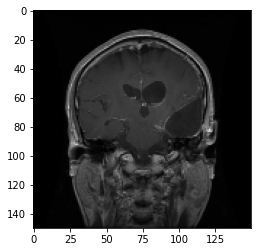

In [15]:

plt.imshow(X[12])

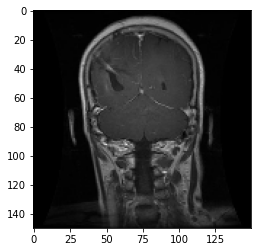

In [9]:
plt.imshow(X[23])

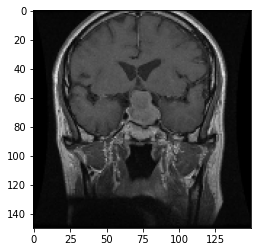

In [10]:
plt.imshow(X[5000])

Feature scaling(since min value is 0 and Max is 255, we simply divide by 255)

In [11]:
X_scaled =X/255

In [12]:
X_scaled.min()

0.0

In [13]:
X_scaled.max()

1.0

SCALED IMAGE OF SOME MRI

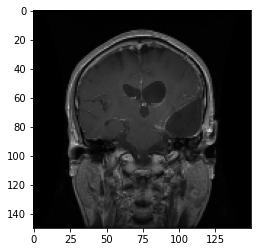

In [14]:
plt.imshow(X_scaled[12])

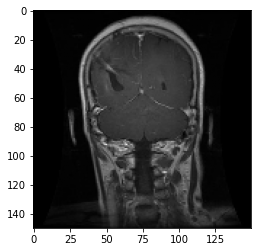

In [15]:
plt.imshow(X_scaled[23])

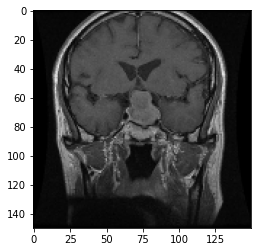

In [16]:
plt.imshow(X_scaled[5000])

reshaping the image 

In [17]:

X_reshape = X_scaled.reshape((len(X_scaled),-1))

In [19]:
X_train = X_reshape
y_train = Y

Now lets read the testing image

In [20]:
X_test= []
Y_test=[]
dirc= 'Testing'
#creating labels
labels = ['glioma','meningioma' ,'notumor' ,'pituitary' ]
for label in tqdm(labels):
    label_num= labels.index(label) # labels encoding
    path = os.path.join(dirc,label) # creating a path for each label 
    for img in os.listdir(path): # after creating a path we create a list of all image in each path/folder
        image_array = cv.imread(os.path.join(path,img)) # reading the images in each folder by using for loop
        image_resize= cv.resize(image_array,(150,150))
        X_test.append(image_resize)
        Y_test.append(label_num)
       

100%|██████████| 4/4 [00:15<00:00,  3.94s/it]


Repeating the some steps as above

In [22]:
#converting to array
X_test= np.asarray(X_test)
Y_test = np.asarray(Y_test)
print("X_test.shape = " ,X_test.shape)
print("Y_test.shape = " ,Y_test.shape)
#Reshaping
X_test = X_test.reshape(len(X_test),-1)
print("X_test.reshape = " , X_test.shape)
#Scaling
X_test_scaled =X_test/255
print("X_test.scaled.max = " ,X_test_scaled.min())
print("X_test.scaled.min = ", X_test_scaled.max())

X_test.shape =  (1297, 150, 150, 3)
Y_test.shape =  (1297,)
X_test.reshape =  (1297, 67500)
X_test.scaled.max =  0.0
X_test.scaled.min =  1.0


In [23]:
X_test = X_test_scaled
y_test = Y_test

Training with K-nearest neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [26]:
y_knn= knn.predict(X_test)
y_knn

array([0, 0, 0, ..., 3, 3, 3])

In [51]:
y_test

array([0, 0, 0, ..., 3, 3, 3])

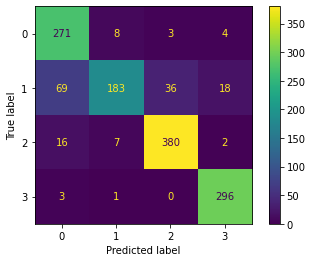

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
confusion = confusion_matrix(y_test, y_knn)
cm_display = ConfusionMatrixDisplay(confusion_matrix =confusion,)

cm_display.plot()
plt.show()

In [53]:
print("{:.2f}%".format(accuracy_score(y_test, y_knn)*100))

87.12%


In [54]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       286
           1       0.92      0.60      0.72       306
           2       0.91      0.94      0.92       405
           3       0.93      0.99      0.95       300

    accuracy                           0.87      1297
   macro avg       0.88      0.87      0.86      1297
weighted avg       0.88      0.87      0.87      1297



Train with Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train,y_train)
y_dtree = dtc.predict(X_test)
print(y_dtree)
print(y_test)

0it [00:09, ?it/s]


[0 0 0 ... 3 3 3]
[0 0 0 ... 3 3 3]


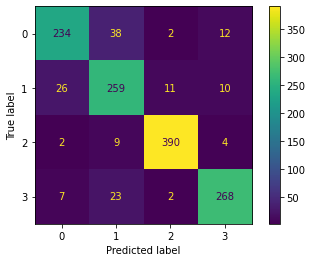

In [63]:
confusion_d_tree = confusion_matrix(y_test, y_dtree)
cm_d_tree = ConfusionMatrixDisplay(confusion_matrix =confusion_d_tree)

cm_d_tree.plot()
plt.show()

In [64]:
print("{:.2f}%".format(accuracy_score(y_test, y_dtree)*100))


88.74%


In [65]:
print(classification_report(y_test, y_dtree))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       286
           1       0.79      0.85      0.82       306
           2       0.96      0.96      0.96       405
           3       0.91      0.89      0.90       300

    accuracy                           0.89      1297
   macro avg       0.88      0.88      0.88      1297
weighted avg       0.89      0.89      0.89      1297



Radom Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini')
rfc.fit(X_train,y_train)
y_rfc = rfc.predict(X_test)
print(y_rfc)
print(y_rfc)

[0 0 0 ... 3 3 3]
[0 0 0 ... 3 3 3]


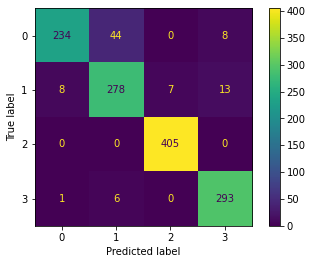

In [67]:
confusion_random_fc= confusion_matrix(y_test, y_rfc)
cm_rfc = ConfusionMatrixDisplay(confusion_matrix = confusion_random_fc)

cm_rfc.plot()
plt.show()


In [68]:
print("{:.2f}%".format(accuracy_score(y_test, y_rfc)*100))


93.29%


In [69]:
print(classification_report(y_test, y_rfc))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       286
           1       0.85      0.91      0.88       306
           2       0.98      1.00      0.99       405
           3       0.93      0.98      0.95       300

    accuracy                           0.93      1297
   macro avg       0.93      0.93      0.93      1297
weighted avg       0.94      0.93      0.93      1297



Since we got a good accuracy score from Random Forest classifier we will use Random forest Classifier

Summary 


In [187]:
print("Algorithm               Accuracy Score")
print("K-nearest neighbors    ",  "{:.2f}%".format(accuracy_score(y_test, y_knn)*100))
print("Decision Tree          ", "{:.2f}%".format(accuracy_score(y_test, y_dtree)*100))
print("Random Forest          ","{:.2f}%".format(accuracy_score(y_test, y_rfc)*100))

Algorithm               Accuracy Score
K-nearest neighbors     87.12%
Decision Tree           88.74%
Random Forest           93.29%


Conclusion: Random Forest has Maximum Accuracy score.
we know that Convolution neural Network is best for Image Classification. I had done this project just to check the accuracy level of Machine learning Algorithm.
Thank you

data is available at 
https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/download?datasetVersionNumber=2